In [78]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [79]:
## url das bases de dados
url_adult_train = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
url_adult_test = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'

In [80]:
## lendo os dados em python
adult_train = pd.read_csv(url_adult_train, sep=',',header=None)
adult_test = pd.read_csv(url_adult_test, sep=',',skiprows=1,header=None)

In [81]:
## dados estão sem cabeçalho, temos que colocar as colunas nos dataframes
columns = ['age','workclass','fnlwgt','education','education_num','marital_status',
           'occupation','relationship','race','sex','capital_gain','capital_loss',
           'hours_per_week','country','income_higher_than_50k']

adult_train.columns = columns
adult_test.columns = columns

In [82]:
# retirando os valores ?
adult_train = adult_train.replace(' ?', np.NaN, inplace=False)
adult_test = adult_test.replace(' ?', np.NaN, inplace=False)

In [83]:
## Conforme documentação do próprio site, a coluna fnlwgt não tem função descrição nenhuma.
## coluna education assim como a coluna education-num representam a mesma informação, vamos trabalhar com a coluna education-num e retirar a education
adult_train = adult_train.drop(['fnlwgt', 'education'], axis = 1)
adult_test = adult_test.drop(['fnlwgt', 'education'], axis = 1)

In [84]:
### Preprocessamento dos dados 
rforest_adult_train = adult_train.copy()
rforest_adult_test = adult_test.copy()

In [85]:
## determinando o valor de y que o se a pessoal tem um income > que 50k
## retirando o valor de y da base de treino
colunas_categoricas = adult_train.select_dtypes('object').columns.tolist()

In [86]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in colunas_categoricas:
   rforest_adult_train[column] = label.fit_transform(rforest_adult_train[column])

In [87]:
## retirando o valor de y da base de treino
y = rforest_adult_train['income_higher_than_50k']
rforest_adult_train.drop(['income_higher_than_50k'], axis = 1, inplace = True)

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split


## agora iremos alocar 30% do dados de treino para o houldout e 70% do dados de treino para base de treino
X_train, X_holdout, y_train, y_holdout = train_test_split(
    rforest_adult_train, y, test_size=0.3, random_state=17
)
# intanciando a classe
random_forest_ = RandomForestClassifier() ## estimador

In [89]:
random_forest = random_forest_.fit(X_train, y_train)

In [90]:
y_pred = random_forest.predict(X_holdout)

In [91]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('Modelo de Decision tree para dados de Holdout')
print('Acuracia Holdout:', accuracy_score(y_pred, y_holdout))
print('Precisão Holdout:', precision_score(y_pred, y_holdout))
print('Revocacao Holdout:', recall_score(y_pred, y_holdout))
print('f1_score Holdout:', f1_score(y_pred, y_holdout))

Modelo de Decision tree para dados de Holdout
Acuracia Holdout: 0.8483979936533934
Precisão Holdout: 0.6222689075630252
Revocacao Holdout: 0.7178865729520116
f1_score Holdout: 0.6666666666666667


In [92]:
### tuning parameters
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth' : [4,5,6,7,8],
            'criterion' :['gini', 'entropy']
}

In [93]:
# tunando random forest para a base de treino
from sklearn.model_selection import GridSearchCV
random_forest_cv = GridSearchCV(estimator = random_forest_, param_grid= param_grid, cv = 5)
random_forest_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [94]:
best_params_rf = random_forest_cv.best_params_
random_forest_cv.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2'}

In [95]:
random_forest_best = RandomForestClassifier(**best_params_rf)
random_forest_best.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2')

In [96]:
y_pred = random_forest_best.predict(X_holdout)

In [97]:
print('Modelo de Decision tree para dados de Holdout')
print('Acuracia Holdout:', accuracy_score(y_pred, y_holdout))
print('Precisão Holdout:', precision_score(y_pred, y_holdout))
print('Revocacao Holdout:', recall_score(y_pred, y_holdout))
print('f1_score Holdout:', f1_score(y_pred, y_holdout))

Modelo de Decision tree para dados de Holdout
Acuracia Holdout: 0.8592486436687481
Precisão Holdout: 0.5428571428571428
Revocacao Holdout: 0.818239392020266
f1_score Holdout: 0.6526900732508208


In [98]:
## Para base de testes
## encoding
for column in colunas_categoricas:
   rforest_adult_test[column] = label.fit_transform(rforest_adult_test[column])

In [99]:
## retirando o valor de y da base de treino
y_teste = rforest_adult_test['income_higher_than_50k']
rforest_adult_test.drop(['income_higher_than_50k'], axis = 1, inplace = True)

In [100]:
# base teste
X_teste = rforest_adult_test.copy()

In [101]:
y_hat = random_forest_best.predict(X_teste)

In [102]:
print('Modelo de Random Forest para dados de teste')
print('Acuracia teste:', accuracy_score(y_hat, y_teste))
print('Precisão teste:', precision_score(y_hat, y_teste))
print('Revocacao teste:', recall_score(y_hat, y_teste))
print('f1_score teste:', f1_score(y_hat, y_teste))

Modelo de Random Forest para dados de teste
Acuracia teste: 0.8567655549413427
Precisão teste: 0.5252210088403536
Revocacao teste: 0.7996832937450514
f1_score teste: 0.6340238543628374


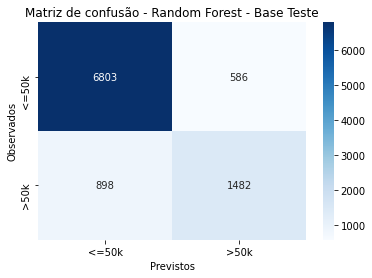

In [103]:
from sklearn.metrics import classification_report, confusion_matrix
cf_matrix_rf = confusion_matrix(y_teste, y_hat)
ax = sn.heatmap(cf_matrix_knn, annot=True, cmap='Blues', fmt='g')

ax.set_title('Matriz de confusão - Random Forest - Base Teste')
ax.set_xlabel('Previstos')
ax.set_ylabel('Observados')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['<=50k','>50k'])
ax.yaxis.set_ticklabels(['<=50k','>50k'])

## Display the visualization of the Confusion Matrix.
plt.show()